<a href="https://colab.research.google.com/github/tb-harris/neuroscience-2024/blob/main/10_Closer_look_at_Dendrite_and_Axon_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install git+https://github.com/tb-harris/diagnostics.git

  Cloning https://github.com/tb-harris/diagnostics.git to /tmp/pip-req-build-033acod3
  Running command git clone --filter=blob:none --quiet https://github.com/tb-harris/diagnostics.git /tmp/pip-req-build-033acod3
  Resolved https://github.com/tb-harris/diagnostics.git to commit 63e7ed899813d387d104118e3b35d435b398c0df
  Preparing metadata (setup.py) ... done
  Created wheel for diagnostics: filename=diagnostics-0.1-py3-none-any.whl size=4725 sha256=9120786a14e174fc6dc6b301cdb1316f9fcd3546c8d2ba5dfeaea9db777ff6f1
  Stored in directory: /tmp/pip-ephem-wheel-cache-_vikm6qj/wheels/21/cb/88/c66692261515f980dd7feb94432c509c089d0277175742724f
Successfully built diagnostics


In [3]:
import pandas as pd
import statsmodels.formula.api as smf
from diagnostics import LinearRegDiagnostic
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read in our morph + genetic data
cell_data = pd.read_hdf('/content/drive/Shareddrives/Lisman Laboratory/Lisman 2024/Neuro/Data/processed data/genes_morph.hdf5.lz4')

# Gets all gene cols where the value for every cell is 0.
zero_genes = cell_data.columns[(cell_data == 0).all()]
# gene_data[zero_genes].sum().sum() # Double check these columns are 0

# Removes all of the columns in zero_genes from our dataframe
cell_data = cell_data.drop(zero_genes, axis="columns")

# Create dataframes with just the gene and morph data
gene_data = cell_data.iloc[:, :-24] # all rows, all columns from start until 24th-to-last
# Puts the last 24 cols into a morph_data dataframe
morph_data = cell_data.iloc[:, -24:] # all rows, all columns from 24-th-to-last to end

## Visualizing our data
Let's visualize relationship between Slc17a7, axon features, dendrite features. Just looking at the correlation values, we can see that there seems to be a relationship with pretty much all axon and dendrite-related features.

In [7]:
morph_data.corrwith(cell_data['Slc17a7']).sort_values()

axon.total_length                   -0.395843
axon.num_nodes                      -0.390330
axon.num_tips                       -0.389730
axon.num_branches                   -0.389724
axon.total_surface_area             -0.356733
all_neurites.total_length           -0.332313
all_neurites.num_tips               -0.329994
all_neurites.num_branches           -0.329989
all_neurites.num_nodes              -0.321146
axon.total_volume                   -0.270436
all_neurites.total_surface_area     -0.183219
basal_dendrite.total_volume         -0.076250
basal_dendrite.total_surface_area   -0.062179
basal_dendrite.total_length         -0.047324
basal_dendrite.num_nodes            -0.020498
basal_dendrite.num_branches          0.065417
basal_dendrite.num_tips              0.084233
all_neurites.total_volume            0.267738
dendrite.total_volume                0.369273
dendrite.total_surface_area          0.442387
dendrite.num_nodes                   0.472673
dendrite.total_length             

Let's consider length for now. We can create scatterplots looking at the relationship of axon and dendrite length w/ our gene

<Axes: xlabel='dendrite.total_length', ylabel='Slc17a7'>

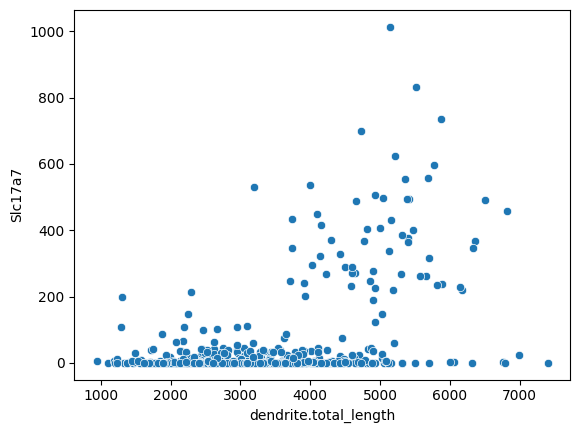

In [11]:
import seaborn as sns
sns.scatterplot(data=cell_data, x='dendrite.total_length', y='Slc17a7')

<Axes: xlabel='axon.total_length', ylabel='Slc17a7'>

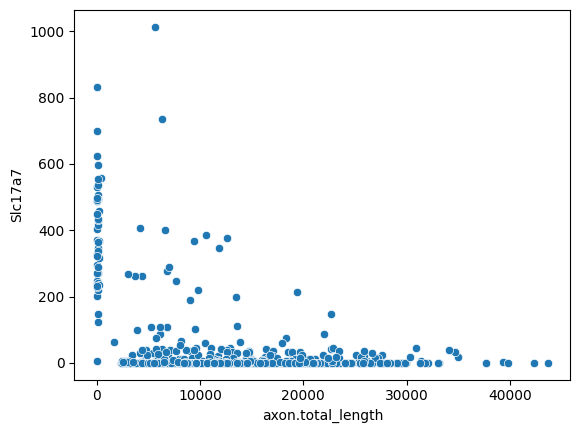

In [12]:
import seaborn as sns
sns.scatterplot(data=cell_data, x='axon.total_length', y='Slc17a7')

Let's load in the metadata file, which has information about each cell:

In [14]:
cell_metadata = pd.read_hdf('/content/drive/Shareddrives/Lisman Laboratory/Lisman 2024/Neuro/Data/processed data/metadata.hdf5.lz4')

In [21]:
cell_metadata.columns

Index(['project', 'cell_specimen_name', 'hemisphere', 'structure', 'donor_id',
       'donor_name', 'biological_sex', 'age', 'ethnicity',
       'medical_conditions', 'full_genotype', 'dendrite_type',
       'apical_dendrite_status', 'neuron_reconstruction_type',
       'cell_soma_normalized_depth', 'depth_from_pia_um', 'ephys_session_id',
       'transcriptomics_sample_id', 'transcriptomics_batch',
       'T-type Accession ID', 'T-type Label', 'MET-type Label'],
      dtype='object')

In [17]:
# Join our metadata and cell data tables
cells_with_metadata = cell_data.join(cell_metadata, how='inner')

In [ ]:
cells_with_metadata

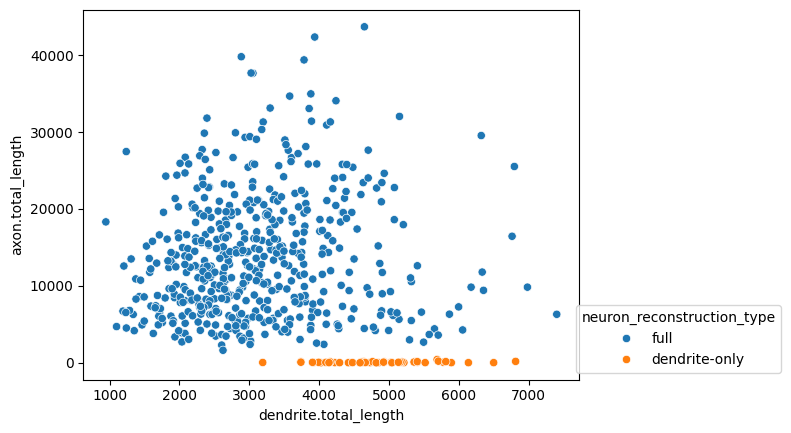

In [30]:
plot = sns.scatterplot(data=cells_with_metadata, x='dendrite.total_length', y='axon.total_length', hue='neuron_reconstruction_type')
sns.move_legend(plot, "lower center", bbox_to_anchor=(1.2, 0))

<Axes: xlabel='dendrite.total_length', ylabel='Count'>

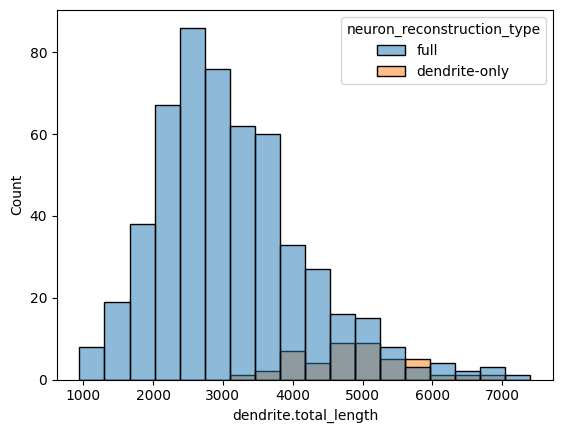

In [86]:
sns.histplot(data=cells_with_metadata, x='dendrite.total_length', hue='neuron_reconstruction_type')

In [35]:
# Gets us a series that's True if a cell is dendrite-only, false otherwise
is_full = cells_with_metadata['neuron_reconstruction_type'] == "full"

In [37]:
cells = cells_with_metadata[is_full]

We now have a collection of cells with only full reconstructions:

In [38]:
cells

,0610005C13Rik,0610006L08Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010B08Rik,0610010F05Rik,0610010K14Rik,...,apical_dendrite_status,neuron_reconstruction_type,cell_soma_normalized_depth,depth_from_pia_um,ephys_session_id,transcriptomics_sample_id,transcriptomics_batch,T-type Accession ID,T-type Label,MET-type Label
cell_specimen_id,,,,,,,,,,,,,,,,,,,,,
601506507,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.216454,0.000000,...,NaN,full,0.361015,NaN,601506492,PS0810_E1-50_S88,BT035,CS180626100018,Vip Gpc3 Slc18a3,Vip-MET-2
601790961,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,full,0.621829,NaN,601790945,PS0817_E1-50_S19,BT036,CS180626100041,Sst Tac2 Myh4,NaN
601803754,0.0,0.0,0.000000,69.658825,0.000000,0.000000,0.000000,0.000000,1.698996,0.000000,...,NaN,full,0.164240,NaN,601803733,PS0817_E1-50_S25,BT036,CS180626100035,Sst Calb2 Pdlim5,Sst-MET-3
601808698,0.0,0.0,152.239614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.674515,...,NaN,full,0.483030,NaN,601808619,PS0817_E1-50_S26,BT036,CS180626100043,Sst Hpse Cbln4,Sst-MET-8
601810307,0.0,0.0,165.312294,0.000000,0.000000,0.000000,0.000000,0.000000,25.931340,19.448505,...,NaN,full,0.295656,NaN,601810292,PS0817_E1-50_S27,BT036,CS180626100034,Sst Calb2 Necab1,Sst-MET-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958930508,0.0,0.0,0.000000,61.169861,0.000000,0.000000,19.574356,0.000000,53.829478,17.127561,...,NaN,full,0.822575,NaN,958930054,SM-J39WD_S118_E1-50,RSC-229,CS180626100053,Pvalb Akr1c18 Ntf3,Pvalb-MET-2
963019667,0.0,0.0,32.972106,0.000000,16.486053,0.000000,0.000000,0.000000,38.467457,32.972106,...,intact,full,0.236484,NaN,963019260,SM-J39WG_S242_E1-50,RSC-229,NaN,NaN,NaN
992386952,0.0,0.0,131.578123,0.000000,0.000000,0.000000,0.000000,0.000000,106.515623,0.000000,...,NaN,full,0.143579,NaN,992386928,SM-J39ZH_S505_E1-50,RSC-240,CS180626100011,Sncg Vip Itih5,Sncg-MET-1


<Axes: xlabel='dendrite.total_length', ylabel='Slc17a7'>

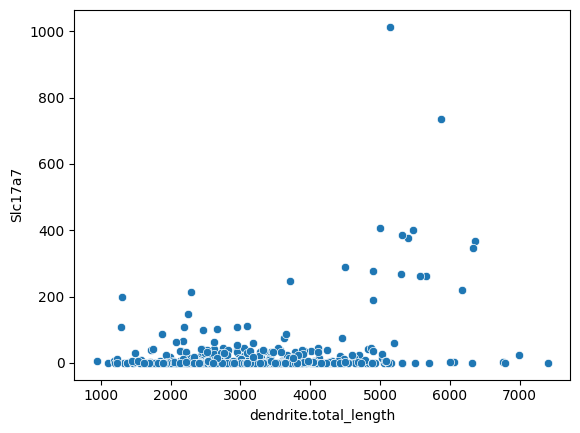

In [39]:
import seaborn as sns
sns.scatterplot(data=cells, x='dendrite.total_length', y='Slc17a7')

<Axes: xlabel='axon.total_length', ylabel='Slc17a7'>

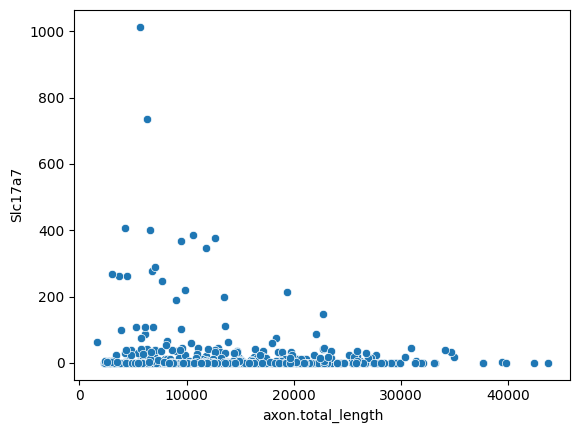

In [40]:
sns.scatterplot(data=cells, x='axon.total_length', y='Slc17a7')

<Axes: xlabel='dendrite.total_length', ylabel='axon.total_length'>

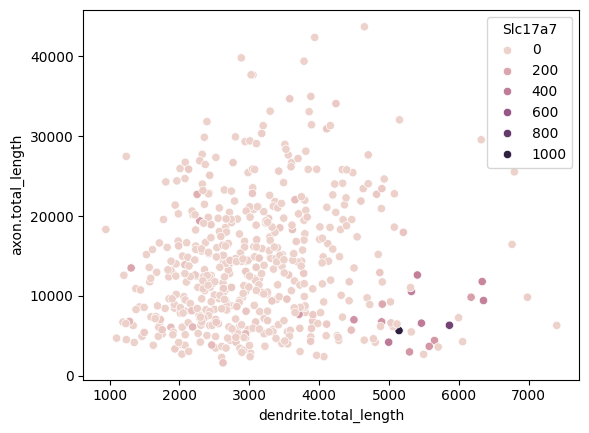

In [41]:
sns.scatterplot(data=cells, x='dendrite.total_length', y='axon.total_length', hue='Slc17a7')

Separating out data again now that we only have a subset of cells:

In [52]:
morph_data = cells.iloc[:, -46:-22] # all rows, all columns from 24-th-to-last to end

In [53]:
morph_data.corrwith(cells['Slc17a7']).sort_values()

axon.num_tips                       -0.156053
axon.num_branches                   -0.156049
axon.total_length                   -0.130031
axon.num_nodes                      -0.124505
axon.total_surface_area             -0.116743
all_neurites.num_tips               -0.113002
all_neurites.num_branches           -0.112999
axon.total_volume                   -0.088613
all_neurites.total_length           -0.086611
all_neurites.num_nodes              -0.078455
basal_dendrite.total_volume         -0.039546
basal_dendrite.total_surface_area   -0.021109
all_neurites.total_surface_area     -0.015702
basal_dendrite.total_length          0.001153
basal_dendrite.num_nodes             0.015285
basal_dendrite.num_branches          0.075944
basal_dendrite.num_tips              0.086777
all_neurites.total_volume            0.192360
dendrite.total_volume                0.218529
dendrite.total_surface_area          0.270997
dendrite.num_nodes                   0.303686
dendrite.total_length             

Let's try modeling dendrite length w/ interaction term:

Let's make a new variable that considers whether Slc17a7 is zero:

In [69]:
is_zero = cells['Slc17a7'] == 0
cells['Slc17a7_is_zero'] = is_zero.astype(int)

<ipython-input-69-f1bb551b3902>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cells['Slc17a7_is_zero'] = is_zero.astype(int)


In [70]:
cells[['Slc17a7', 'Slc17a7_is_zero']]

,Slc17a7,Slc17a7_is_zero
cell_specimen_id,,
601506507,0.000000,1
601790961,0.000000,1
601803754,44.173889,0
601808698,0.000000,1
601810307,32.414175,0
...,...,...
958930508,0.000000,1
963019667,346.207109,0
992386952,0.000000,1


In [90]:
# Tried controlling for Slc17a7 being zero
model = smf.ols(
    data=cells,
    formula='Q("dendrite.total_length") ~ Slc17a7 + Slc17a7_is_zero'
).fit()

In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Q("dendrite.total_length")   R-squared:                       0.095
Model:                                    OLS   Adj. R-squared:                  0.091
Method:                         Least Squares   F-statistic:                     27.42
Date:                        Tue, 16 Jul 2024   Prob (F-statistic):           4.71e-12
Time:                                16:31:05   Log-Likelihood:                -4399.4
No. Observations:                         528   AIC:                             8805.
Df Residuals:                             525   BIC:                             8818.
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3096.5270     74.463     41.585      0.000    2950.245    3242.809
Slc17a7             4.0486      0.610      6.638      0.000       2.850       5.247
Slc17a7_is_zero   -95.6162     93.940     -1.018      0.309    -280.161      88.929
==============================================================================
Omnibus:                       54.079   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.113
Skew:                           0.726   Prob(JB):                     1.09e-17
Kurtosis:                       4.201   Cond. No.                         204.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our zero control was not significant -- so let's try a model without it

[(0.0, 100.0)]

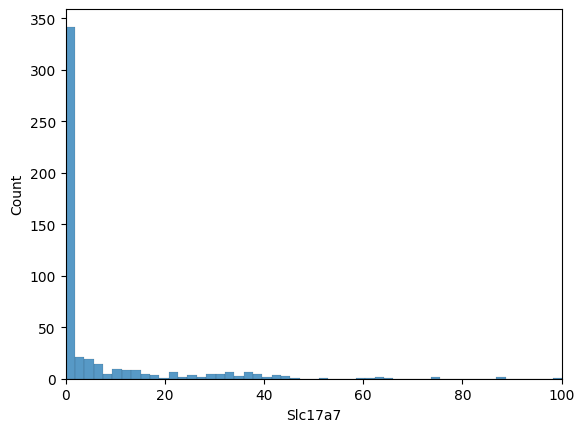

In [78]:
sns.histplot(cells['Slc17a7']).set(xlim=(0, 100))

In [80]:
(cells['Slc17a7'] == 0).sum()

310

In [83]:
# Tried controlling for Slc17a7 being zero
model = smf.ols(
    data=cell_data,
    formula='Q("dendrite.total_length") ~ Slc17a7'
).fit()

In [84]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Q("dendrite.total_length")   R-squared:                       0.225
Model:                                    OLS   Adj. R-squared:                  0.223
Method:                         Least Squares   F-statistic:                     165.4
Date:                        Tue, 16 Jul 2024   Prob (F-statistic):           2.05e-33
Time:                                16:35:47   Log-Likelihood:                -4772.9
No. Observations:                         573   AIC:                             9550.
Df Residuals:                             571   BIC:                             9559.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3057.6361     44.820     68.221      0.000    2969.604    3145.668
Slc17a7        4.1947      0.326     12.859      0.000       3.554       4.835
==============================================================================
Omnibus:                       50.151   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.462
Skew:                           0.669   Prob(JB):                     1.36e-15
Kurtosis:                       4.038   Cond. No.                         147.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""